# Exploring Matplotlib's Plot Layouts



In this notebook, we explore the working with multiple grids of Axes, and various layouts,  with use of Matplotlib  
* Figures   
* Axes   
* Subplots  
* Gridspecs   
* etc. etc. (Other plot formatting options)  

*We will not look at plotting datasets yet! ... just how to layout (blank) plots*

https://matplotlib.org/stable/api/figure_api.html  
https://matplotlib.org/stable/api/axes_api.html#basic  
https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec  


![alt text](../images/sphx_glr_anatomy_001.webp)

Start with imports and look at plotting blank plots for now...   
Display a blank "canvas"/"panel", or what Matplotlib calls a **"Figure"**, with 1 Axes

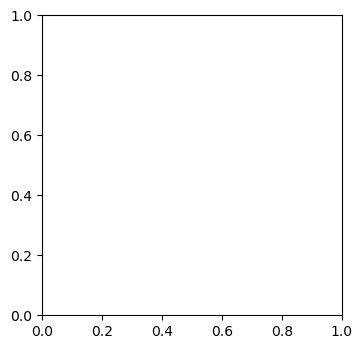

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gds
import numpy as np

fig = plt.figure(figsize = (6,6)) #Create Canvas 600 x600

#plot Add axes 300x300 
axes1 = fig.add_axes(rect=[0,0,0.5,0.5])



Add another Axes alongside(not overlapping) with a different axes range

(20.0, 50.0)

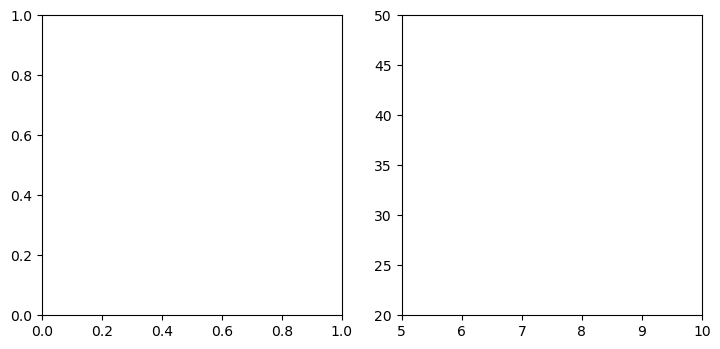

In [2]:
fig = plt.figure(figsize = (6,6)) #Create Canvas 600 x600

#plot Add axes 300x300 
axes1 = fig.add_axes(rect=[0,0,0.5,0.5])


#plot Add another axes 300x300, starting at 0.6x600 and aX Axis ranged 5 to 10 and a Y Axis ranged 20 to 50
axes2 = fig.add_axes(rect=[0.6,0,0.5,0.5])
axes2.set_xlim(5, 10)
axes2.set_ylim(20, 50)



Add Titles/Labels to Figure Axes

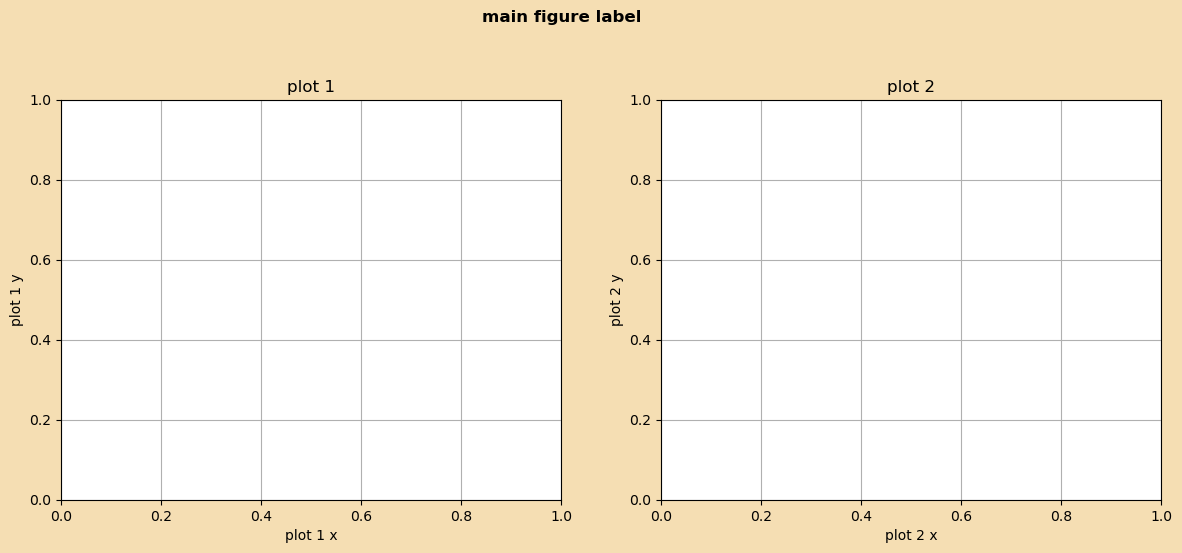

In [3]:
fig = plt.figure(figsize = (5,5)) #Create Canvas 600 x600

#plot Add axes 300x300 
axes1 = fig.add_axes(rect=[0,0,1.0,0.8])


#plot Add another axes 300x300, starting at 0.6x600 and aX Axis ranged 5 to 10 and a Y Axis ranged 20 to 50
axes2 = fig.add_axes(rect=[1.2,0,1.0,0.8])
fig.set_label('figure label')
#add plot titles
axes1.set_title('plot 1')
axes2.set_title('plot 2')

#add x,y axis labels
axes1.set_xlabel('plot 1 x')
axes1.set_ylabel('plot 1 y')
axes2.set_xlabel('plot 2 x')
axes2.set_ylabel('plot 2 y')

#add axis grids
axes1.grid()
axes2.grid()

#set label on main figure (formatted with bold font)
fig.suptitle("main figure label", x = 1.0, fontweight = "bold")

#set a backgound color for figure
fig.set_facecolor('wheat')


### look at Subplots
Retrieve both the figure and axes  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot

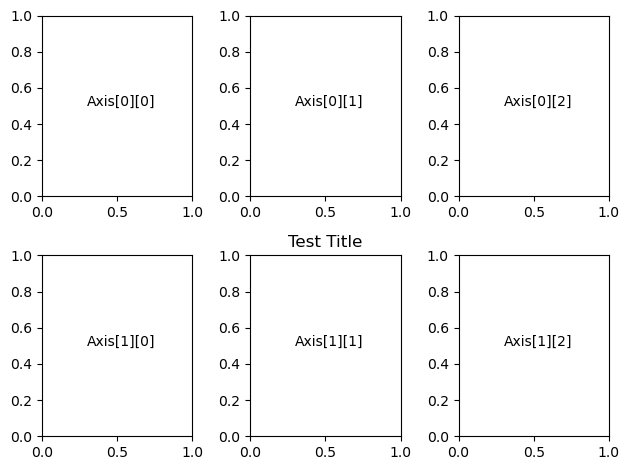

In [4]:
#plot a grid of 3 x 2 plots
fig, ax = plt.subplots(2,3, tight_layout = True) #returns a tuple with the figure and axes objects

#add a title to the 5th Axes [1][1]
ax[1][1].set_title("Test Title")

#iterate thru grid of 3x2 axes and an an annotation to each plot
for ax_x in range(3):
    for ax_y in range(2):
        ax[ax_y,ax_x].annotate(f"Axis[{ax_y}][{ax_x}]", xy=(0.3,0.5))
        

### Explore combined subplots (spanning rows) with Gridspec

https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec

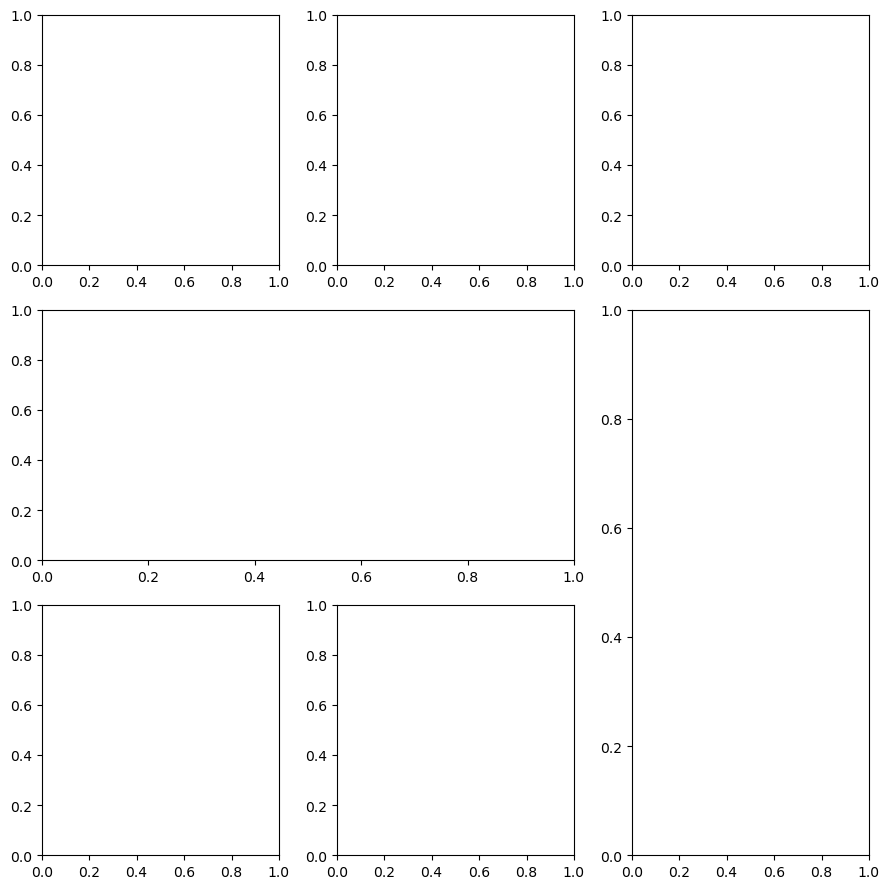

In [5]:
#Create a 3x3 subplot grid in 900x900 figure
fig, axs = plt.subplots(figsize=(9, 9), ncols=3, nrows=3, tight_layout=True)
gs1 = axs[1,2].get_gridspec()
gs2 = axs[0,1].get_gridspec()

#Use splicing syntax to reference (and remove) axes
for ax in axs[1, :2]:
    ax.remove()
for ax in axs[1:, -1]:
    ax.remove()

#replot axes with gridspec
ax_g1 = fig.add_subplot(gs1[1:, -1])
ax_g2 = fig.add_subplot(gs2[1, :2])

Rather than creating full 3x3 subplot grid, and then removing select axes(to replot merged plots).  
Add subplots as needed (and use splicing to define row/column spanning)  ...

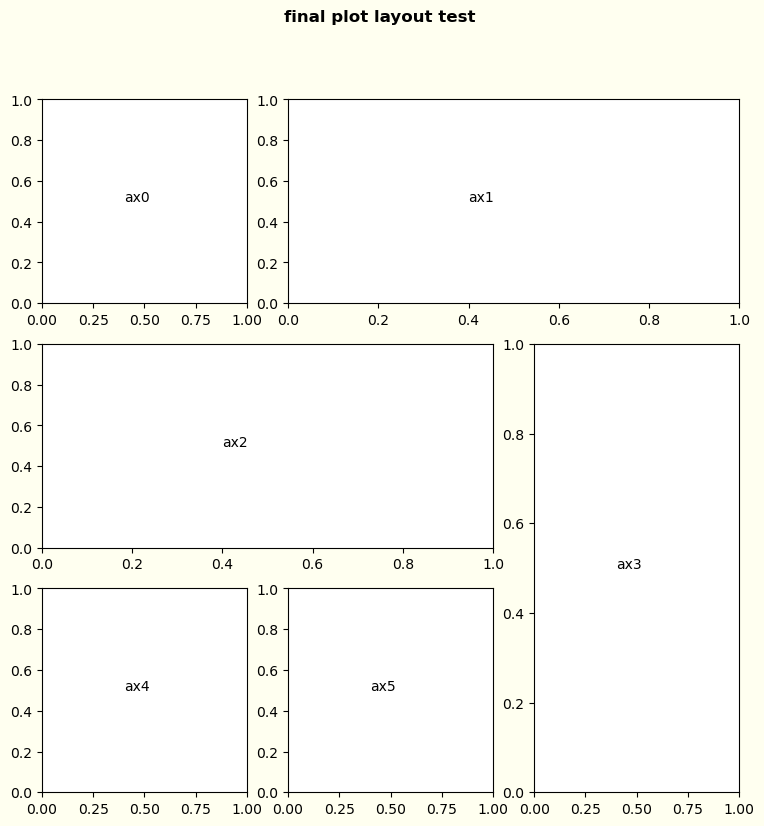

In [6]:
#Create a 900x900 figure (no subplots)
fig = plt.figure(figsize=(9, 9), facecolor = 'ivory')
fig.suptitle("final plot layout test", x = 0.5, fontweight = "bold")
#add Gridspec
gs = gds.GridSpec(3,3, figure=fig)

#add subplots (using splicing where combined rows/columns needed)
ax0 = fig.add_subplot(gs[0, 0]).annotate('ax0', xy=(0.4,0.5))
ax1 = fig.add_subplot(gs[0, 1:]).annotate('ax1', xy=(0.4,0.5))
ax2 = fig.add_subplot(gs[1, :-1]).annotate('ax2', xy=(0.4,0.5))
ax3 = fig.add_subplot(gs[1:, -1]).annotate('ax3', xy=(0.4,0.5))
ax4 = fig.add_subplot(gs[-1, 0]).annotate('ax4', xy=(0.4,0.5))
ax5 = fig.add_subplot(gs[-1, -2]).annotate('ax5', xy=(0.4,0.5))

### Annotations and Arrows  
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html  
https://matplotlib.org/3.1.1/gallery/userdemo/connectionstyle_demo.html#sphx-glr-gallery-userdemo-connectionstyle-demo-py  



Text(0.8, 0.62, 'arrow #3 xy=(0.4, 0.9)')

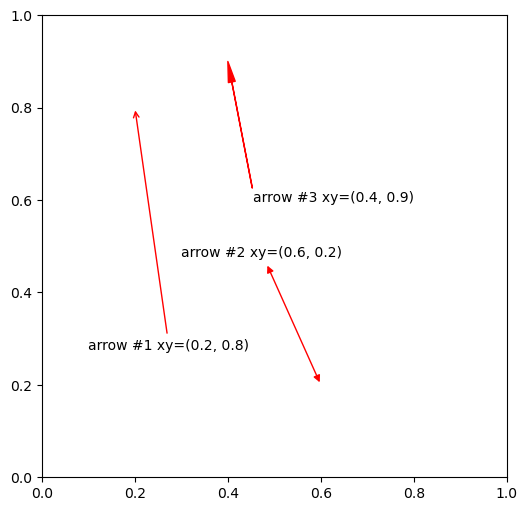

In [ ]:
#Lets go back to a basic plot
fig, ax = plt.subplots(1,1, figsize = (6,6)) #Create Canvas 600 x600

#xy = Coordinates of point arrow points to
#xytext = Coordinates of annotation text arrow extends from (note the horizontalalignment!)
ax.annotate('arrow #1 xy=(0.2, 0.8)', xy=(0.2, 0.8), xycoords='data',
            xytext=(0.1, 0.3), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='red',lw=1,ls='-'),
            horizontalalignment='left', verticalalignment='top')

ax.annotate('arrow #2 xy=(0.6, 0.2)', xy=(0.6, 0.2), xycoords='data',
            xytext=(0.3, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle= '<|-|>', color='red',lw=1,ls='-'),
            horizontalalignment='left', verticalalignment='top')

ax.annotate('arrow #3 xy=(0.4, 0.9)', xy=(0.4, 0.9), xycoords='data',
            xytext=(0.8, 0.62), textcoords='data',
            arrowprops=dict(color='red',lw=1,ls='-', headlength=15, headwidth=5, width=0.1),
            horizontalalignment='right', verticalalignment='top')
